<a href="https://colab.research.google.com/github/Fayikk/DeepLearning_Keras/blob/master/Vectors_Matris_Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VECTORS

In [ ]:
import numpy as np
x=np.array(7)
print(x)
#Bu aslında skaler bir sayıdır.

7


In [ ]:
x.ndim

1

In [ ]:
x=np.array([7,14,21])
print(x)

[ 7 14 21]


In [ ]:
x.ndim

1

In [ ]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])#array tanımlaması.
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
x.ndim #dimension(boyutu) 2 boyutlu oldu ve artık biz buna matris diyoruz.

2

In [ ]:
#Birde tensor deneyelim.
x=np.array([[[1,2,3],
            [4,5,6]],
           [[11,12,13],
           [14,15,16]],
           [[10,4,7],
            [10,4,7]]])
x

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[11, 12, 13],
        [14, 15, 16]],

       [[10,  4,  7],
        [10,  4,  7]]])

In [ ]:
x.ndim #tensor olarak 3 boyutlu olduklarını görmüş oluyoruz.

3

In [ ]:
from keras.datasets import mnist
(train_images , train_labels),(test_images,test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.ndim)#train images 3 boyutlu olduğu bilgisini almaktayız.

3


In [ ]:
print(train_images.shape)#28e 28 olduğunu görmekteyiz

(60000, 28, 28)


In [ ]:
print(test_images.ndim)#3 boyutlu bir tensor olduğunu ndim(dimension komutu ile görebilirz.)
print(test_images.shape)#10 bin tane test için ayrılmış durumda olduğunu görmekteyiz.


3
(10000, 28, 28)


In [ ]:
print(train_images.dtype)#verinin tipine bakabiliriz

uint8


In [ ]:
digits=train_images[128]#train images içerisindeki verilerden yararlanaark okuma işlmemlerini yapalım
#train_imagrs tensor içerisindeki 7.indekse sahip değer abktığımzda 3 rakamını ekranda göreceğizdir.

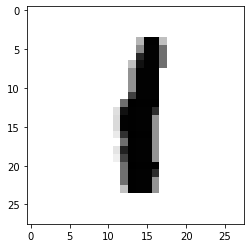

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digits,cmap=plt.cm.binary)
plt.show()

In [ ]:
#aralıktaki görüntüleri kendi dizinimize kaydedelim.
dizinim=train_images[0:128]
print(dizinim.shape)#paket olarak görebilmek için shape komutunu ekleme yapmalıyız.

(128, 28, 28)


In [ ]:
dizinim=train_images[7:77,:,:]
dizinim.shape

(70, 28, 28)

In [ ]:
dizinim=train_images[7:77,0:14,14:28]
dizinim.shape

(70, 14, 14)

In [ ]:
#görüntü verisi genellikle tensor'dür.

# İŞLEMLER
  *Eleman temelli 
Bu işlemler tensörün her elemanına ayrı ayrı uygulanır.  

In [ ]:
def naive_add(x,y):
  assert len(x.shape)==2#x ve y 2boyutlu tensorü olarak tanımlanmış olacaktır.
  assert x.shape==y.shape
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x    #Burada matrisler arasında basit bir toplama ,işlei  yapan yapıyı görüyoruz.

In [ ]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])
y=np.array([[2,3,4],[5,6,7],[8,9,1]])

z=naive_add(x,y)
print(z[[2],[2]])#z'nin 2.indektesi matrisinin 2.indisteki değerine ulaşım sağlamaktayız.

[10]


In [ ]:
import numpy as np
x=np.array([[1,2,3],
            [4,5,6],
            [7,8,9]])
y=np.array([[2,3,4],
            [5,6,7],
            [8,9,1]])

z=x+y
z#Herhangi bir tanımlama yapmadan numpy kütüphanesi kullanarak matrislerde işlemleri daha kolay hale getirebiliriz.

array([[ 3,  5,  7],
       [ 9, 11, 13],
       [15, 17, 10]])

In [ ]:
def naive_ref(x,y):
  assert len(x.shape)==2
  assert x.shape==y.shape
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] *= y[i,j]
  return x #çarpma işlemi için gerekli fonksiyonu elle yazdık

In [ ]:
x=np.array([[1,2,3],
            [4,5,6],
            [7,8,9]])
y=np.array([[2,3,4],
            [5,6,7],
            [8,9,1]])
z=naive_ref(x,y)
# print(z[[2],[2]])
z


array([[ 2,  6, 12],
       [20, 30, 42],
       [56, 72,  9]])

In [ ]:
#numpy kütüphanesi sayesinde çarpma işlemini kolay bir şekilde yapmaktayız.
z=x*y
z

array([[ 2,  6, 12],
       [20, 30, 42],
       [56, 72,  9]])

In [ ]:
import numpy as np
z=np.maximum(x,0.)
z

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

## YAYMA OPERASYONU
*Matris ile vektörü topladığımız anda yayma işlemi yapmış oluyoruz.Buna yayma işlemi denmektedir.

In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape)==2
  assert len(y.shape)==1
  assert x.shape[1]==y.shape[0]
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]+=y[j]
  return x    #yayma operasyonu için kodlama işlemlerimizi gerçekleştirmiş oluyoruz.


In [ ]:
#bir x matrisine ve birde y vektörüne ihtiyacımız olacaktır.
x=np.array([[1,2,3],[4,5,6],[7,8,9]])
y=np.array([7,14,21])
result=naive_add_matrix_and_vector(x,y)
result


array([[ 8, 16, 24],
       [11, 19, 27],
       [14, 22, 30]])

In [ ]:
import numpy as np
x=np.random.random((64,3,32,10))
y=np.random.random((32,10))
z=np.maximum(x,y)
z.shape #numpy kütüphanesi sayesinde 

(64, 3, 32, 10)

# İÇ ÇARPIM İŞLEMİ

In [ ]:
import numpy as np
x=np.array([[1,2],
            [1,2]])
y=np.array([[1,2],
            [1,2]])
z=np.dot(x,y)
z

array([[3, 6],
       [3, 6]])

#KANAL ŞEKİL DEĞİŞRTİRME SHAPE/RESHAPE

In [ ]:
# BİR TENSOR TANIMLAMASI YAPALIM
x=np.array([[0.,1.],
            [2.,3.],
            [4.,5.]])
x.shape#3'E 2'lik bir matristir bu.

(3, 2)

In [ ]:
x=x.reshape((6,1))#Burada tüm elemanları 6 satır 1 sütun şeklinde reshape etmiş olduk.

x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x=x.reshape(2,3)#Burada 2 satır 3 sürun şeklinde tanımlamamızı yapmış oluyoruz.
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x=np.zeros((100,10))#0'lardan boyutunu verdiğimiz 1 matris oluşturalım.
x=np.transpose(x)#yatay ve dikey'de yer değişikliği yaptık.
print(x.shape)

(10, 100)


#TÜREV GEREKLİLİĞİ